In [790]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split


In [791]:
df=pd.read_csv("D:\\dsml\\pr\\beer-servings.csv",index_col=0)

In [792]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


sanity check

In [794]:
df.shape

(193, 6)

In [795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [796]:
df.duplicated().sum()

0

In [797]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


From anlaysing this we can easily unedertsodd the skewness

In [799]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [800]:
df['country'].nunique()

193

so there is 193 data and in country all of its are uniques so its not essential 

In [802]:
#droping country
df=df.drop(columns=['country'])

In [803]:
df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...
188,NaN,100.0,3.0,7.7,South America
189,111.0,2.0,1.0,2.0,Asia
190,6.0,0.0,0.0,0.1,Asia
191,32.0,19.0,4.0,2.5,Africa


In [804]:
df.isnull().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [805]:
numeric=[ 'beer_servings', 'spirit_servings', 'wine_servings']

In [806]:
for i in numeric:
    df[i]=df[i].fillna(df[i].median())

In [807]:
df.isnull().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [808]:
df=df.dropna()

In [809]:
df.isnull().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

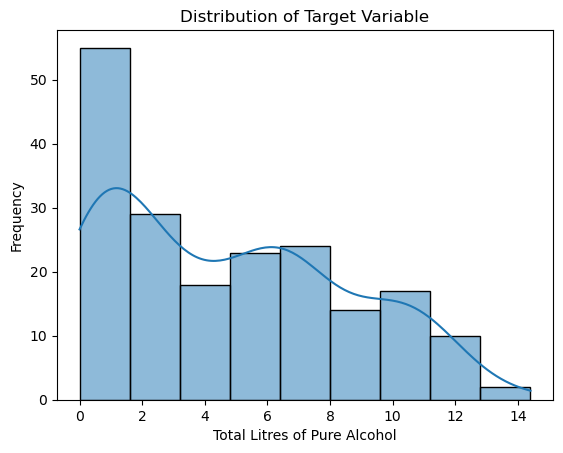

In [810]:
sns.histplot(data=df, x='total_litres_of_pure_alcohol', kde=True,)
plt.xlabel('Total Litres of Pure Alcohol')  
plt.ylabel('Frequency')  
plt.title('Distribution of Target Variable')  
plt.show()

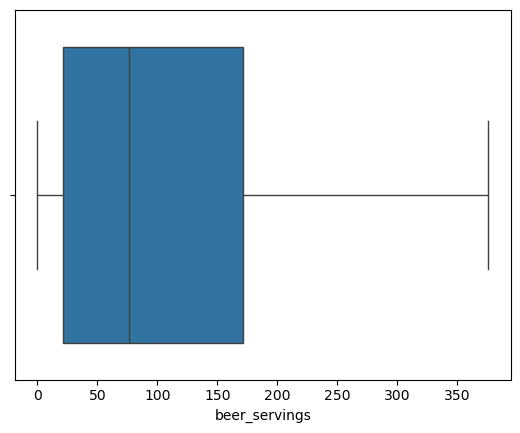

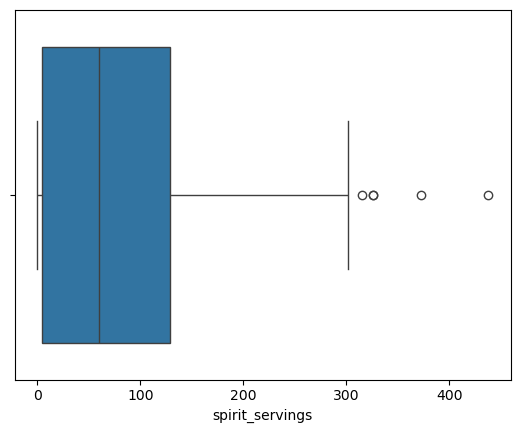

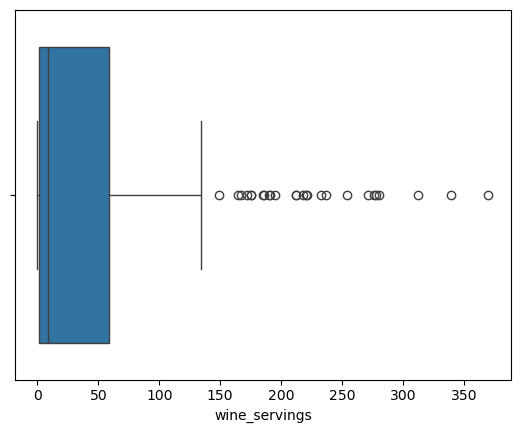

In [811]:
#boxplot for outlier detection
for i in  numeric:
    sns.boxplot(data=df,x=i)
    plt.show()

In [812]:
#outlier treatment IQR method
q1=df['spirit_servings'].quantile(0.25)
q3=df['spirit_servings'].quantile(0.75)
IQR=q3-q1
low=q1-(1.5*IQR)
upr=q3+(1.5*IQR)
df['spirit_servings'] = np.where(df['spirit_servings'] > upr, upr, 
                                 np.where(df['spirit_servings'] < low, low, df['spirit_servings']))


C:\Users\harikrishnan\AppData\Local\Temp\ipykernel_17540\4126764329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spirit_servings'] = np.where(df['spirit_servings'] > upr, upr,


In [813]:
#outlier treatment IQR method
q1=df['wine_servings'].quantile(0.25)
q3=df['wine_servings'].quantile(0.75)
IQR=q3-q1
low=q1-(1.5*IQR)
upr=q3+(1.5*IQR)
df['wine_servings'] = np.where(df['wine_servings'] > upr, upr, 
                                 np.where(df['wine_servings'] < low, low, df['wine_servings']))


C:\Users\harikrishnan\AppData\Local\Temp\ipykernel_17540\3169933367.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wine_servings'] = np.where(df['wine_servings'] > upr, upr,


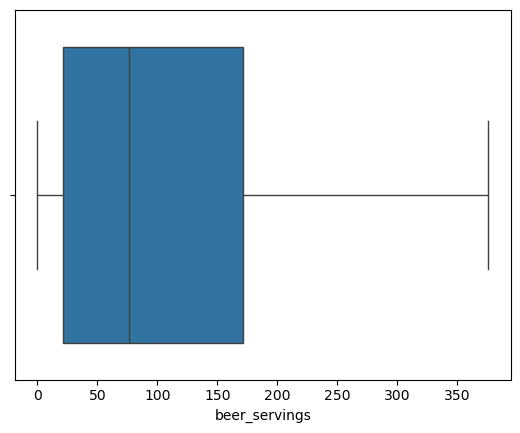

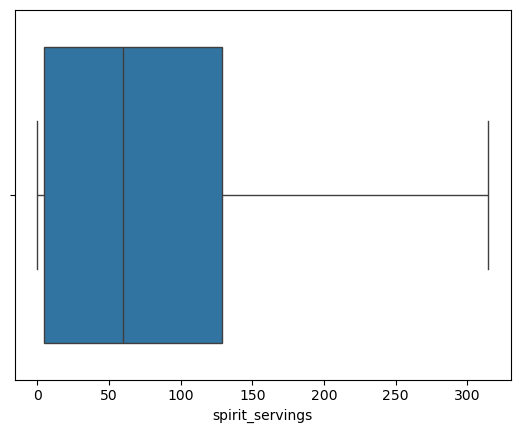

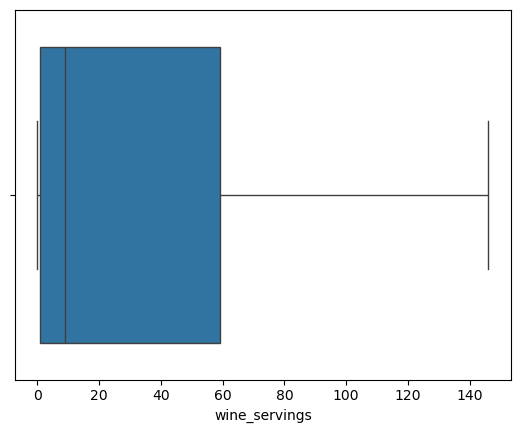

In [814]:
#boxplot afeter outlier treatment
for i in  numeric:
    sns.boxplot(data=df,x=i)
    plt.show()

In [815]:
df.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,146.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


beer_servings skewness = 0.88


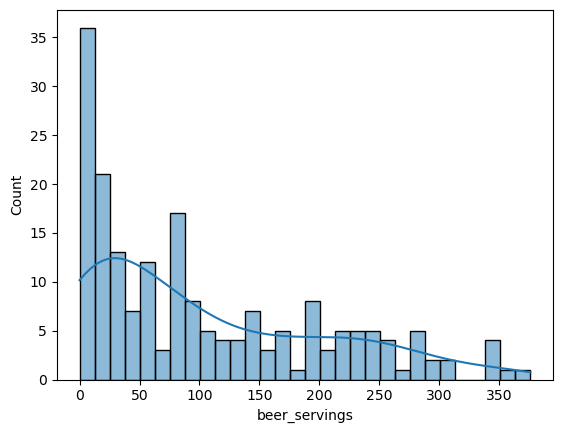

spirit_servings skewness = 1.08


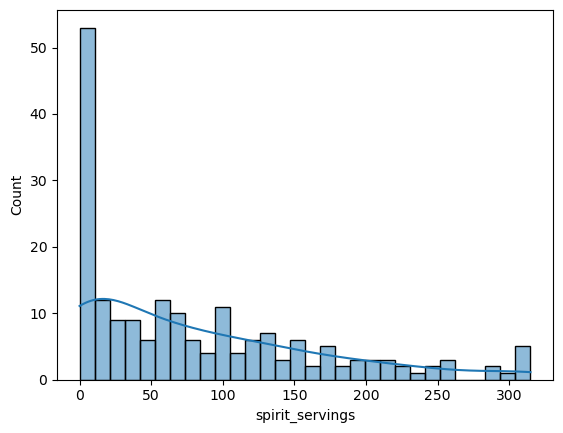

wine_servings skewness = 1.23


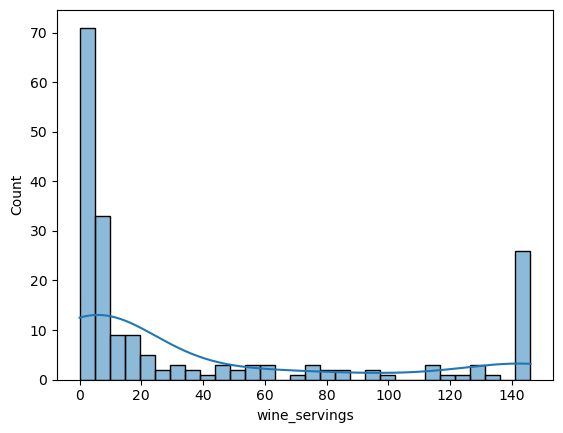

In [816]:
for i in numeric:
    sns.histplot(data=df, x=i, kde=True, bins=30)
    print(f"{i} skewness = {df[i].skew():.2f}") 
    plt.show()


In [817]:
for i in[ 'wine_servings']:
    df[i]=np.log1p(df[i])

C:\Users\harikrishnan\AppData\Local\Temp\ipykernel_17540\438883208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=np.log1p(df[i])


In [818]:
for i in[ 'beer_servings', 'spirit_servings']:
    df[i]=np.sqrt(df[i])

C:\Users\harikrishnan\AppData\Local\Temp\ipykernel_17540\3324443173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=np.sqrt(df[i])


beer_servings skewness = 0.10


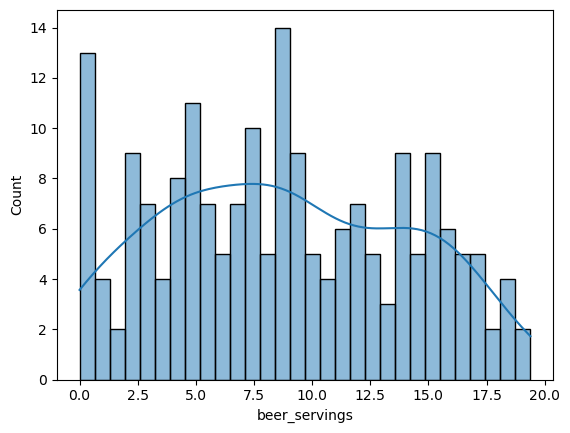

spirit_servings skewness = 0.14


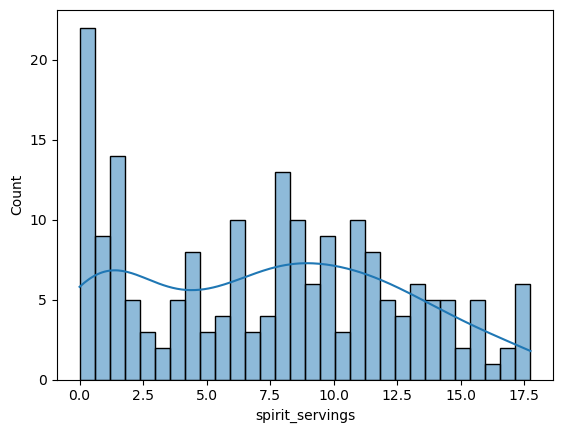

wine_servings skewness = 0.11


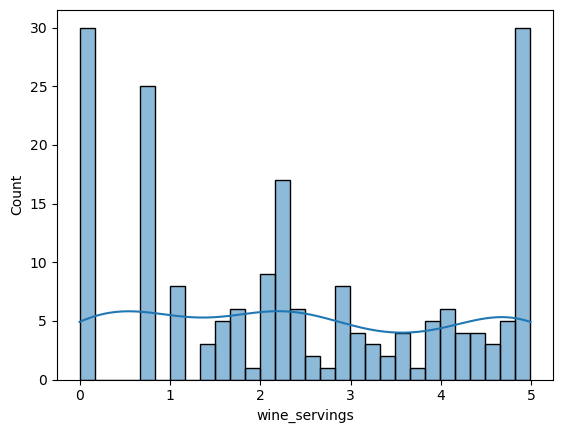

In [819]:
for i in numeric:
    sns.histplot(data=df,x=i,kde=True,bins=30)
    print(f"{i} skewness = {df[i].skew():.2f}") 
    plt.show()

In [820]:
numeric_data = df.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
correlation_matrix

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.596295,0.720518,0.843925
spirit_servings,0.596295,1.000000,0.541513,0.695380
wine_servings,0.720518,0.541513,1.000000,0.750732
total_litres_of_pure_alcohol,0.843925,0.695380,0.750732,1.000000


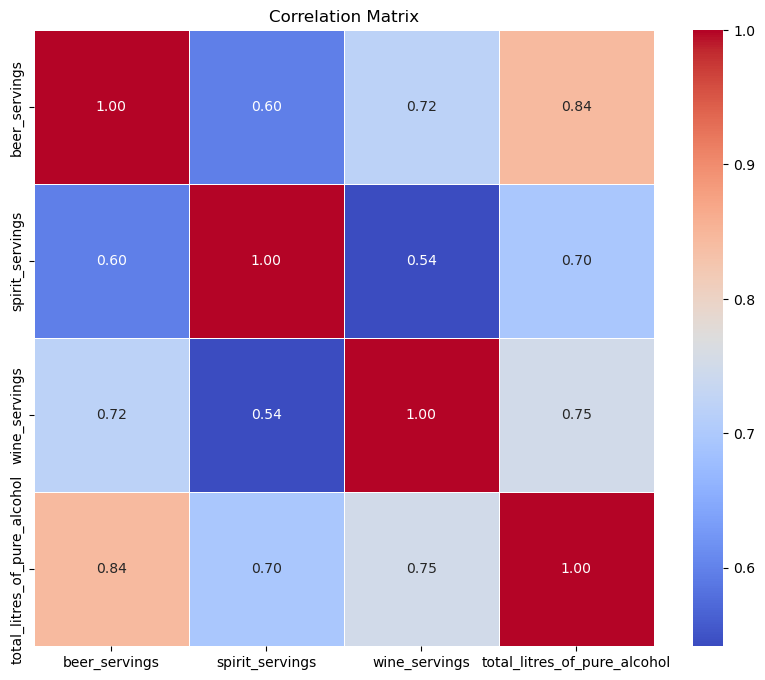

In [821]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [822]:
df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.000000,0.000000,0.000000,0.0,Asia
1,9.433981,11.489125,4.007333,4.9,Europe
2,5.000000,0.000000,2.708050,0.7,Africa
3,15.652476,11.747340,4.990433,12.4,Europe
4,14.730920,7.549834,3.828641,5.9,Africa
...,...,...,...,...,...
188,8.717798,10.000000,1.386294,7.7,South America
189,10.535654,1.414214,0.693147,2.0,Asia
190,2.449490,0.000000,0.000000,0.1,Asia
191,5.656854,4.358899,1.609438,2.5,Africa


one hot encoding using dummie pandas

In [824]:
df=pd.get_dummies(df,columns=['continent']).astype(int)
df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0,0,0,0,0,1,0,0,0,0
1,9,11,4,4,0,0,1,0,0,0
2,5,0,2,0,1,0,0,0,0,0
3,15,11,4,12,0,0,1,0,0,0
4,14,7,3,5,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
188,8,10,1,7,0,0,0,0,0,1
189,10,1,0,2,0,1,0,0,0,0
190,2,0,0,0,0,1,0,0,0,0
191,5,4,1,2,1,0,0,0,0,0


In [825]:
#scaling
scaler=StandardScaler()

In [826]:
df[numeric]= scaler.fit_transform(df[numeric])
df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,-1.610771,-1.389011,-1.243838,0,0,1,0,0,0,0
1,0.133222,0.795346,1.317201,4,0,0,1,0,0,0
2,-0.641886,-1.389011,0.036682,0,1,0,0,0,0,0
3,1.295883,0.795346,1.317201,12,0,0,1,0,0,0
4,1.102106,0.001034,0.676941,5,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
188,-0.060555,0.596768,-0.603578,7,0,0,0,0,0,1
189,0.326999,-1.190433,-1.243838,2,0,1,0,0,0,0
190,-1.223217,-1.389011,-1.243838,0,0,1,0,0,0,0
191,-0.641886,-0.594700,-0.603578,2,1,0,0,0,0,0


In [827]:
df[numeric].skew()

beer_servings      0.153795
spirit_servings    0.177704
wine_servings      0.071007
dtype: float64

In [828]:
#spliting of data
x=df.drop(columns=['total_litres_of_pure_alcohol'])
y=df['total_litres_of_pure_alcohol']

In [829]:
x

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,-1.610771,-1.389011,-1.243838,0,1,0,0,0,0
1,0.133222,0.795346,1.317201,0,0,1,0,0,0
2,-0.641886,-1.389011,0.036682,1,0,0,0,0,0
3,1.295883,0.795346,1.317201,0,0,1,0,0,0
4,1.102106,0.001034,0.676941,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
188,-0.060555,0.596768,-0.603578,0,0,0,0,0,1
189,0.326999,-1.190433,-1.243838,0,1,0,0,0,0
190,-1.223217,-1.389011,-1.243838,0,1,0,0,0,0
191,-0.641886,-0.594700,-0.603578,1,0,0,0,0,0


In [830]:
y

0       0
1       4
2       0
3      12
4       5
       ..
188     7
189     2
190     0
191     2
192     4
Name: total_litres_of_pure_alcohol, Length: 192, dtype: int32

In [831]:
#train and test data split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [832]:
x_train.shape

(153, 9)

In [833]:
x_test.shape

(39, 9)

In [834]:
from sklearn.linear_model import LinearRegression
#setting linear regression model
l_model=LinearRegression()
l_model.fit(x_train,y_train)
linear_model_prediction=l_model.predict(x_test)

In [835]:
 # for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [836]:
# Function to evaluate model
def evaluate_model(y_actual, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_actual, y_pred))
    print("MSE:", mean_squared_error(y_actual, y_pred))
    print("R2 Score:", r2_score(y_actual, y_pred))
    print("\n")
    

In [837]:
evaluate_model(y_test,linear_model_prediction,'Linear Regression')

Linear Regression Performance:
MAE: 1.1219618267922264
MSE: 2.1905125632193188
R2 Score: 0.8638426804799108




In [897]:
# Function to visualize actual vs predicted values
def visualize_predictions(y_actual, y_pred, model_name):
    results_df = pd.DataFrame({'Actual': y_actual.values, 'Predicted': y_pred})
    print(results_df.head(30))
    
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=y_actual, y=y_pred, color='blue', alpha=0.6)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.show()

    Actual  Predicted
0        0  -1.138120
1        0   1.155533
2        2   1.932717
3       10   7.911827
4        0   1.541367
5        1   1.274126
6       10   9.479278
7        0   0.306061
8        6   6.863586
9        9   8.919463
10       0  -1.138120
11       4   5.345504
12       8   7.511776
13       1   2.064688
14       1   2.725494
15       5   4.222012
16       2   4.134942
17       0   0.773834
18       4   5.074241
19       2   2.846644
20       1   2.425733
21      11   9.986303
22       0  -0.018489
23      11   9.154728
24      11   7.902879
25       0  -0.217259
26      10   9.949808
27       8   7.806518
28      11   7.909316
29       6   1.685746


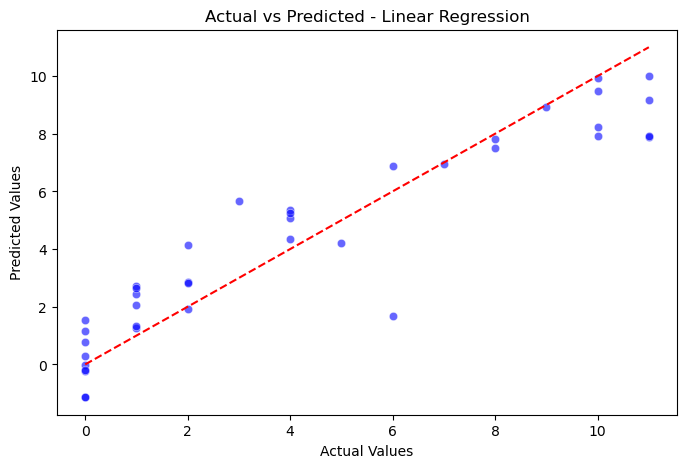

In [899]:
visualize_predictions(y_test,linear_model_prediction, "Linear Regression")

In [895]:

#predictng a data
nd=pd.DataFrame([[8.717798,10.000000,1.386294,'South America']],columns = ['beer_servings', 'spirit_servings', 'wine_servings','continent'])

In [839]:
nd

,beer_servings,spirit_servings,wine_servings,continent
0,8.717798,10.0,1.386294,South America


In [840]:
nd=pd.get_dummies(nd,columns=['continent']).astype(int)
nd

,beer_servings,spirit_servings,wine_servings,continent_South America
0,8,10,1,1


In [841]:
nd[numeric]=scaler.transform(nd[numeric])
nd

,beer_servings,spirit_servings,wine_servings,continent_South America
0,-0.060555,0.596768,-0.603578,1


In [842]:
nd = nd.reindex(columns=x_train.columns, fill_value=0)
nd
#reindexing in order to get columns index full or it will not predict

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,-0.060555,0.596768,-0.603578,0,0,0,0,0,1


In [843]:
#prediting
unseen=l_model.predict(nd)
unseen

array([4.64090692])